In [66]:
!pip install matplotlib
!pip install seaborn

1. Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re 

2. Load the dataframe

In [ ]:
customer_df = pd.read_csv(r"C:\Users\angel\Desktop\Data Analysis\Ironhack\Labs\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


3. Look at its main features

In [ ]:
customer_df.shape

(9134, 24)

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns

In [ ]:
customer_df.columns = customer_df.columns.str.lower().str.replace(" ", "_")
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.

In [ ]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"], format="%m/%d/%y")

6. Plot a correlation matrix, and comment on what you observe

<Axes: >

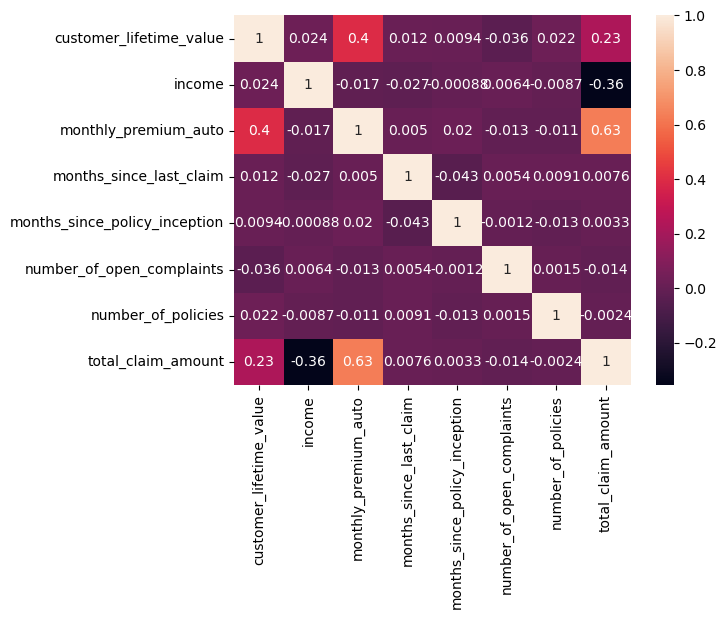

In [ ]:
numerical = customer_df.select_dtypes("number")
correlation_matrix = numerical.corr()
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
correlation_matrix["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

The strong positive correlation between monthly premium and total claim amount suggests that premium levels significantly impact claim amounts. The negative correlation with income indicates that customers with higher incomes tend to have lower claim amounts. The relationship between CLV and claim amounts is positive, suggesting that customers with higher CLV may present higher claim amounts.

7. Plot every continuous variable. Comment what you can see in the plots.

customer_lifetime_value


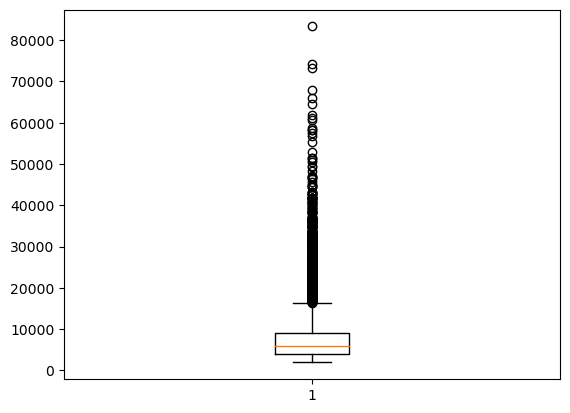

income


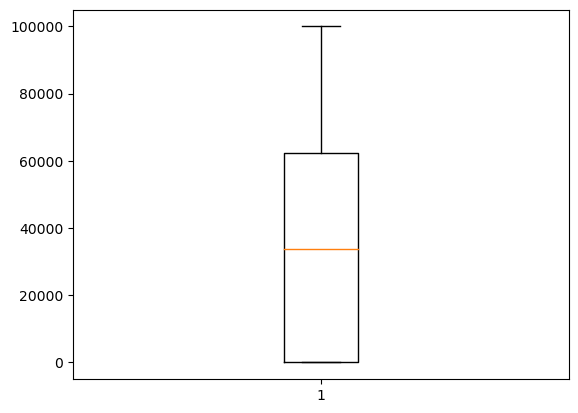

monthly_premium_auto


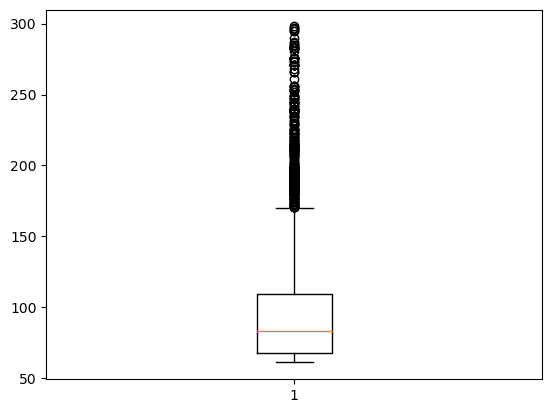

months_since_last_claim


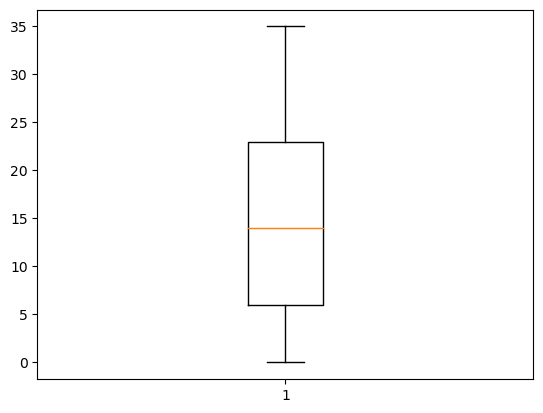

months_since_policy_inception


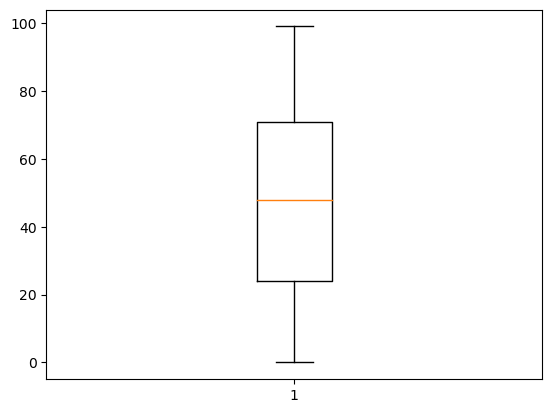

number_of_open_complaints


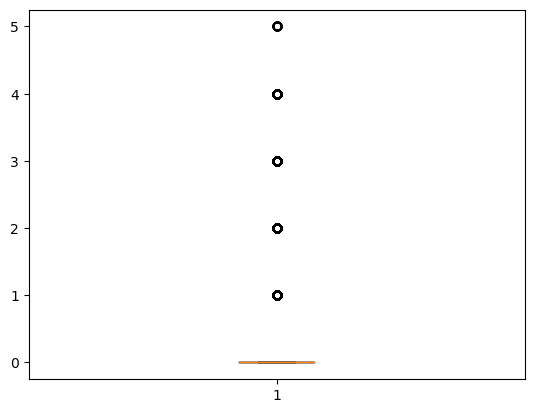

number_of_policies


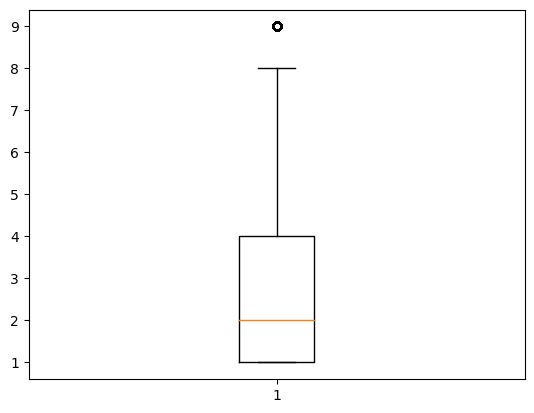

total_claim_amount


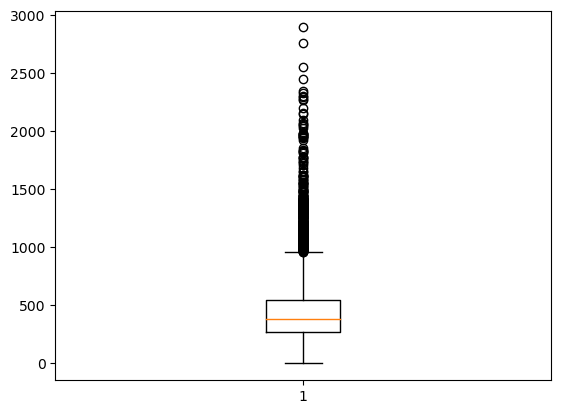

In [ ]:
for var in numerical.columns:
    print(var)
    plt.boxplot(numerical[var])
    plt.show()


8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.

In [ ]:
df_copy = customer_df.copy()
categorical = df_copy.select_dtypes("object")
categorical.drop(columns="customer", axis=1)
categorical_columns = categorical.columns


customer


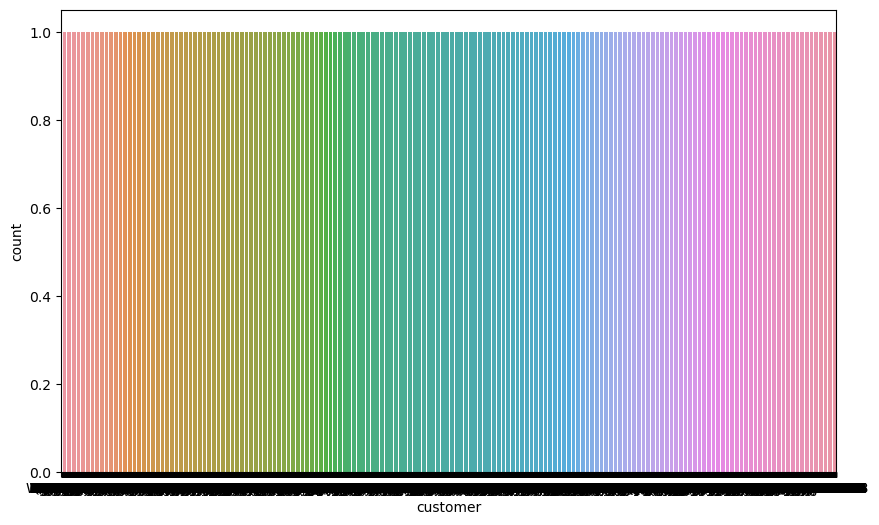

state


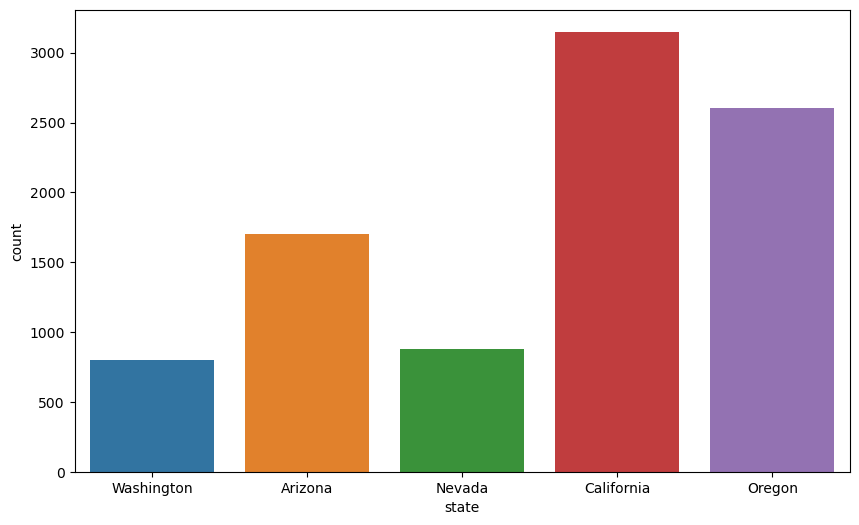

response


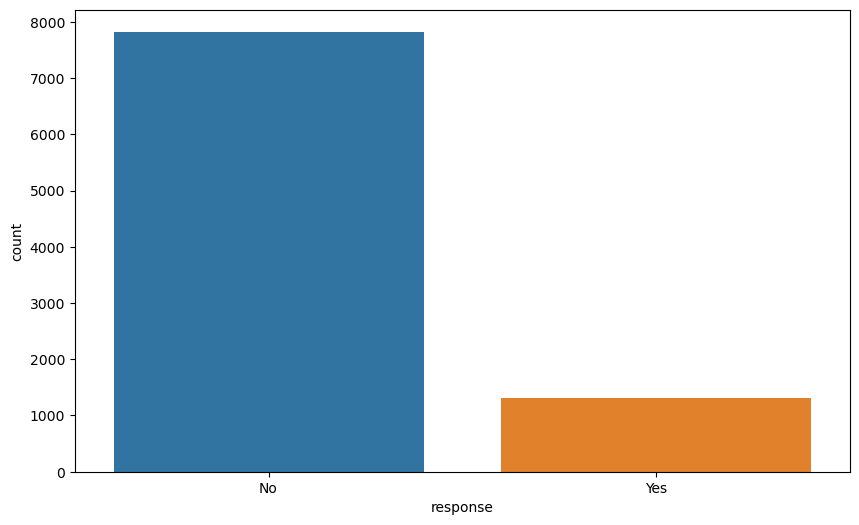

coverage


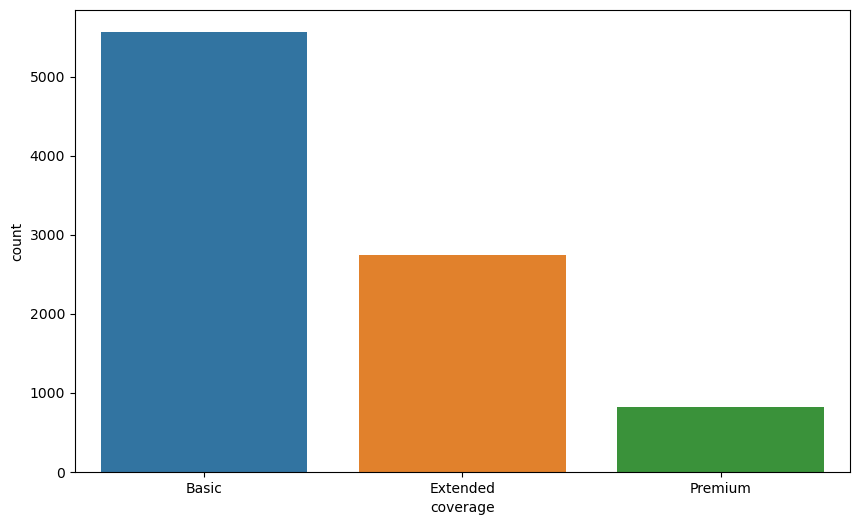

education


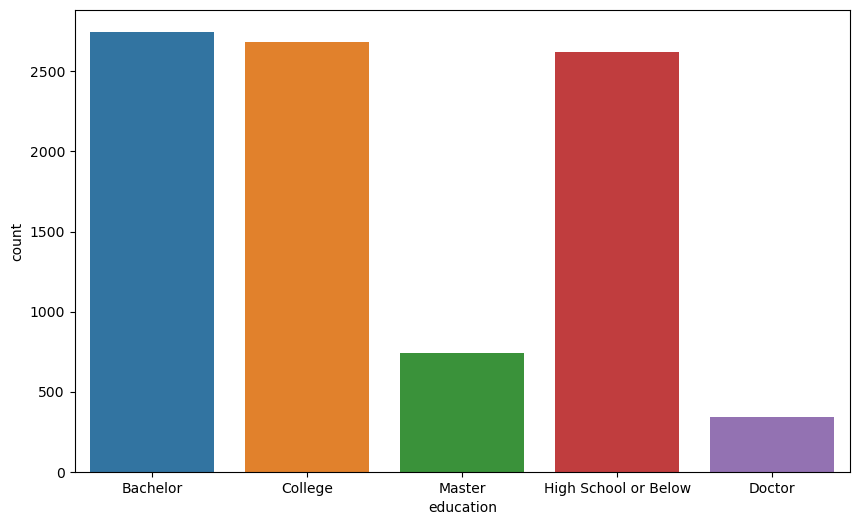

employmentstatus


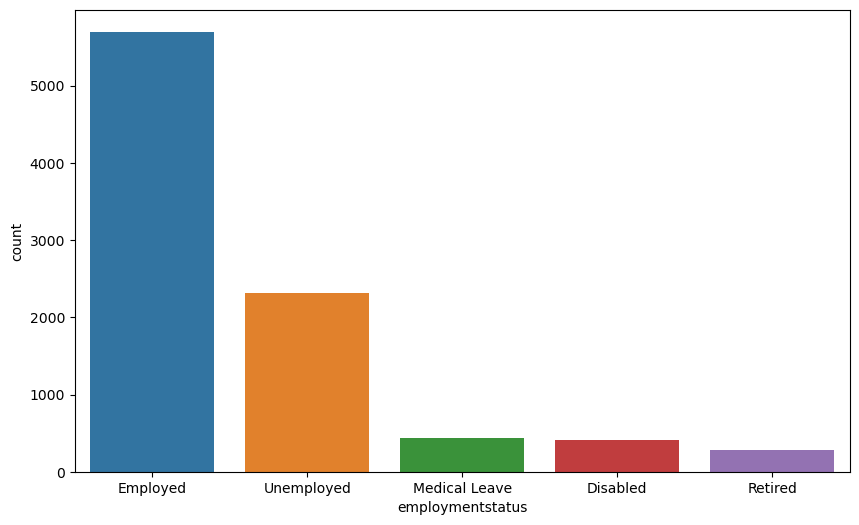

gender


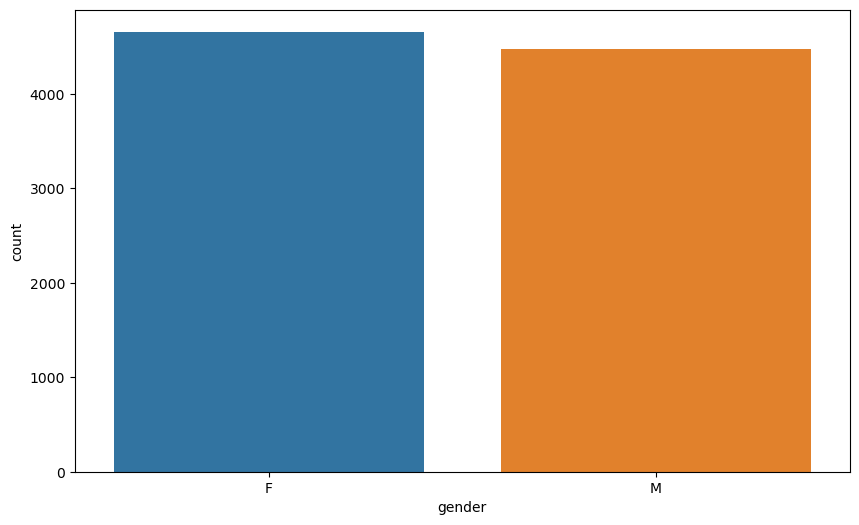

location_code


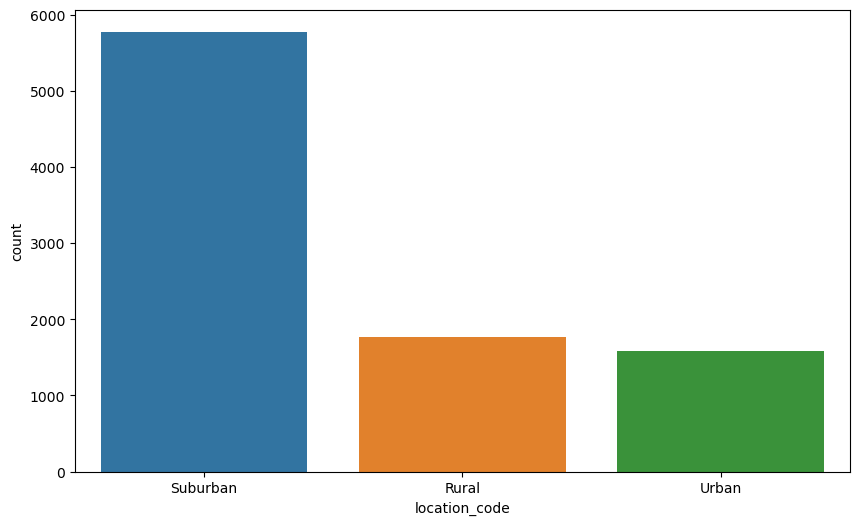

marital_status


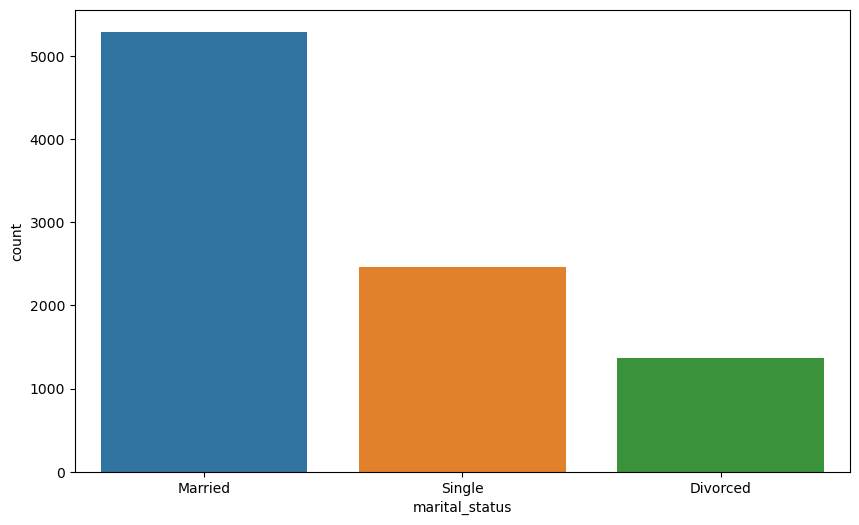

policy_type


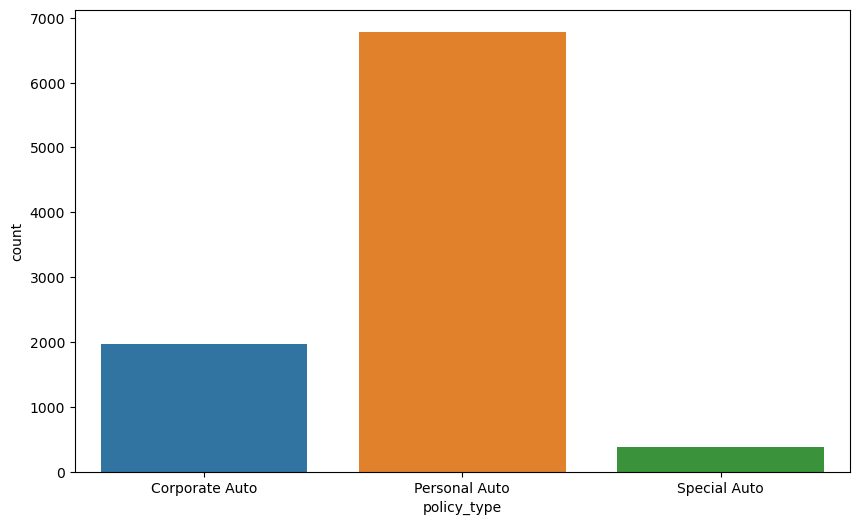

policy


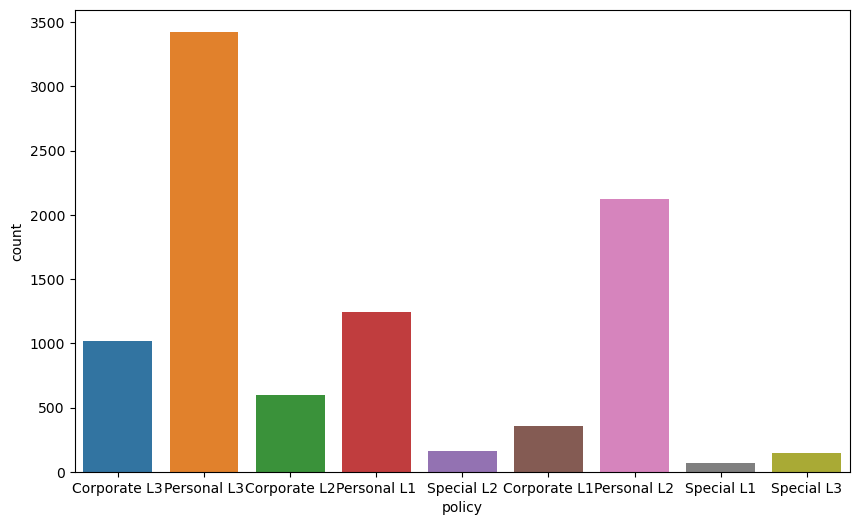

renew_offer_type


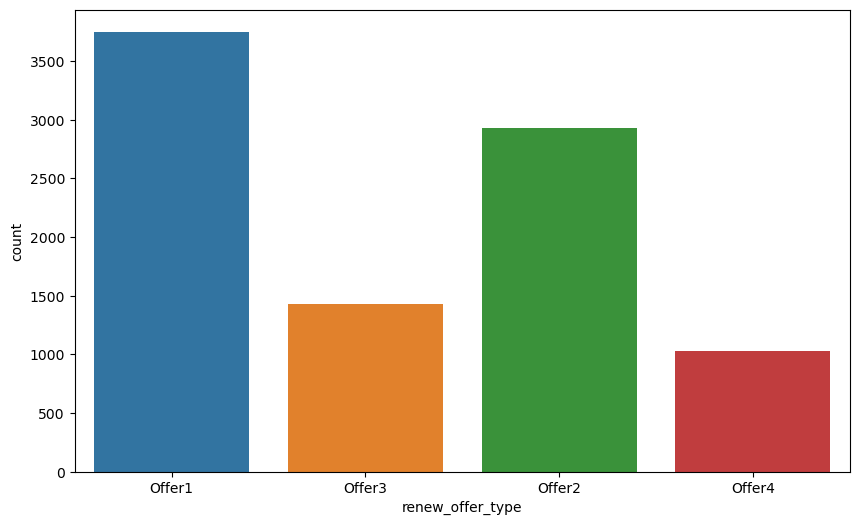

sales_channel


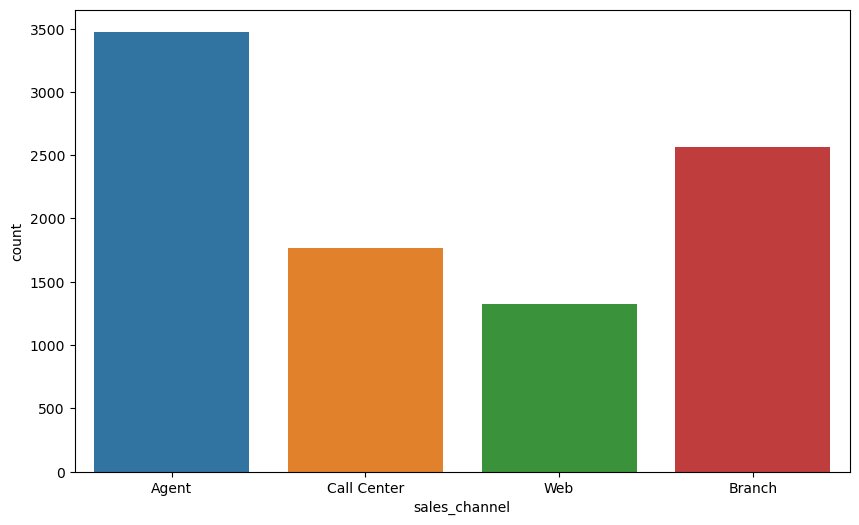

vehicle_class


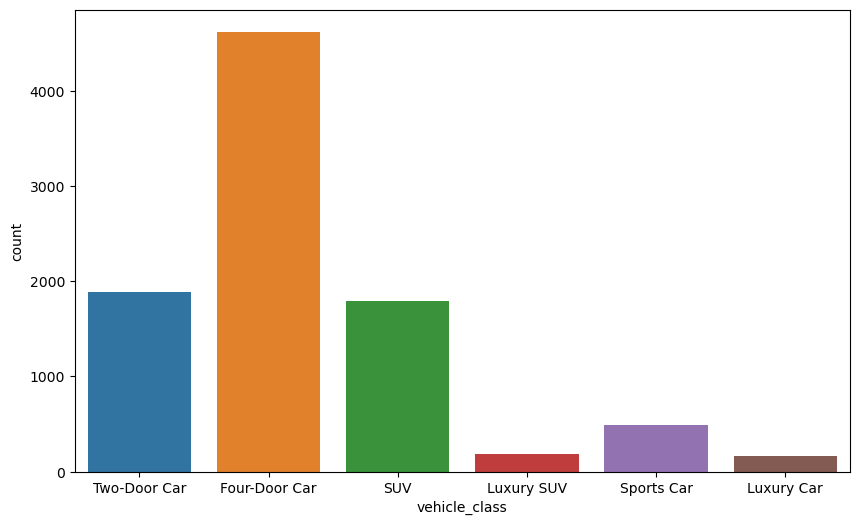

vehicle_size


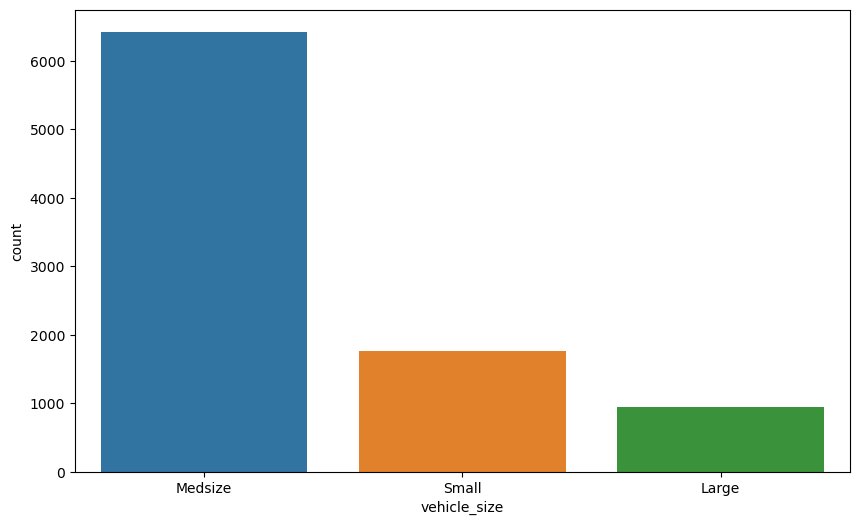

In [65]:
for col in categorical_columns:
    print(col)
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=categorical)
    plt.show()

9. Check all columns for NaN values

In [67]:
df_copy.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64